In [1]:
pip install pandas_ta

Note: you may need to restart the kernel to use updated packages.


In [2]:
from utils import load_dataset
import pandas_ta as ta
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = load_dataset('./KO.csv')

In [4]:
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

Date
2023-08-14    0.000000
2023-08-11    0.004763
2023-08-10    0.000657
2023-08-09    0.002957
2023-08-08    0.000657
                ...   
2013-08-22   -0.370729
2013-08-21   -0.371222
2013-08-20   -0.365145
2013-08-19   -0.363009
2013-08-16   -0.358574
Name: CUMPCTRET_1, Length: 2515, dtype: float64

In [66]:
help(df.ta.adx)

Help on method adx in module pandas_ta.core:

adx(length=None, lensig=None, mamode=None, scalar=None, drift=None, offset=None, **kwargs) method of pandas_ta.core.AnalysisIndicators instance
    # Trend



In [57]:
df.ta.ema(length=200)

Date
2023-08-14          NaN
2023-08-11          NaN
2023-08-10          NaN
2023-08-09          NaN
2023-08-08          NaN
                ...    
2013-08-22    39.399790
2013-08-21    39.388648
2013-08-20    39.381298
2013-08-19    39.375315
2013-08-16    39.372078
Name: EMA_200, Length: 2515, dtype: float64

In [79]:
np.fromstring('0.003', dtype=float)

/tmp/ipykernel_562/2108543960.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring('0.003', dtype=float)


ValueError: string size must be a multiple of element size

In [60]:
#x =df.ta.macd(length=10).to_numpy()
x = df.ta.ema(length=20).to_numpy()
x = np.where(np.isfinite(x),x, 0)
y = df.ta.ema(length=200).to_numpy()
y = np.where(np.isfinite(y),y, 0)


prices=df.loc[:,'Close'].to_numpy()

In [75]:
ma1 = df.ta.ema(length=20).to_numpy()
ma1 = np.where(np.isfinite(ma1), ma1, 0)

ma2 = df.ta.ema(length=200).to_numpy()
ma2 = np.where(np.isfinite(ma2), ma2, 0)

macd = df.ta.macd().to_numpy()
macd = np.where(np.isfinite(macd), macd, 0)

adx = df.ta.adx().to_numpy()
adx = np.where(np.isfinite(adx), adx, 0)

rsi = df.ta.rsi().to_numpy()
rsi = np.where(np.isfinite(rsi), rsi, 0)

np.column_stack((ma1, ma2, macd, adx, rsi,))[200]

array([60.1848754 , 61.48056716, -0.21832837, -0.06636305, -0.15196532,
       22.63257435, 13.48386012, 25.66727415, 38.08199367])

In [83]:
len((9,7))

2

In [67]:
np.column_stack((x,y,))[500]

array([56.10497304, 57.85057867])

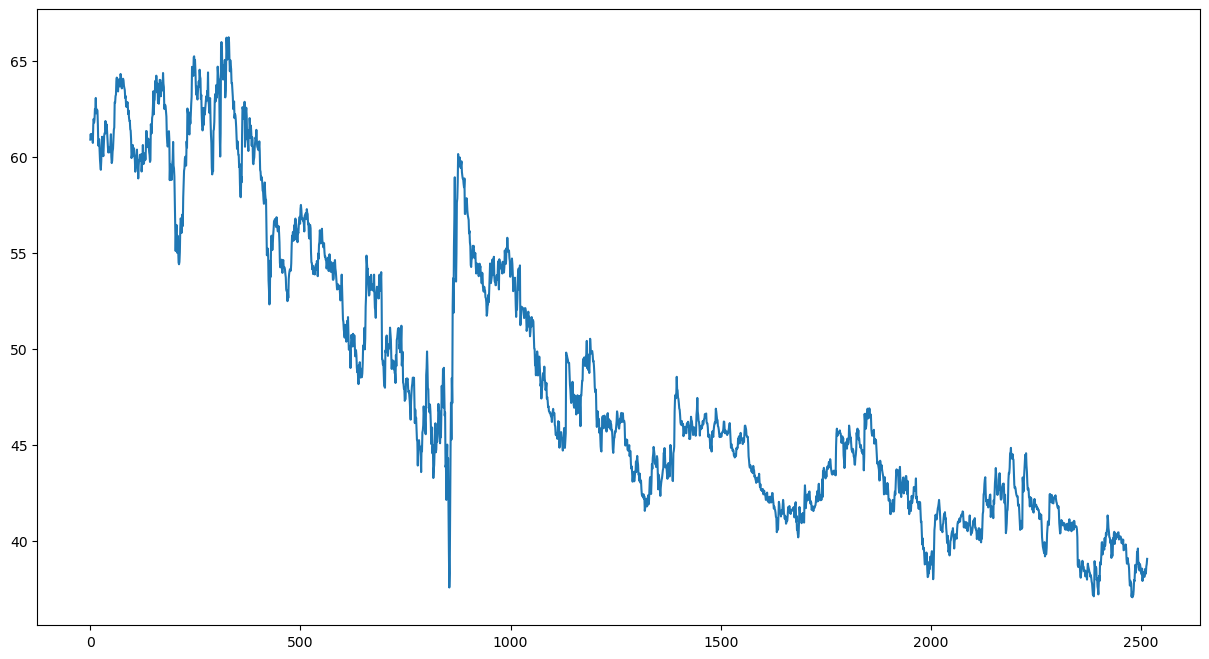

In [29]:
plt.figure(figsize=(15, 8))
plt.plot(df.loc[:,'Close'].to_numpy())


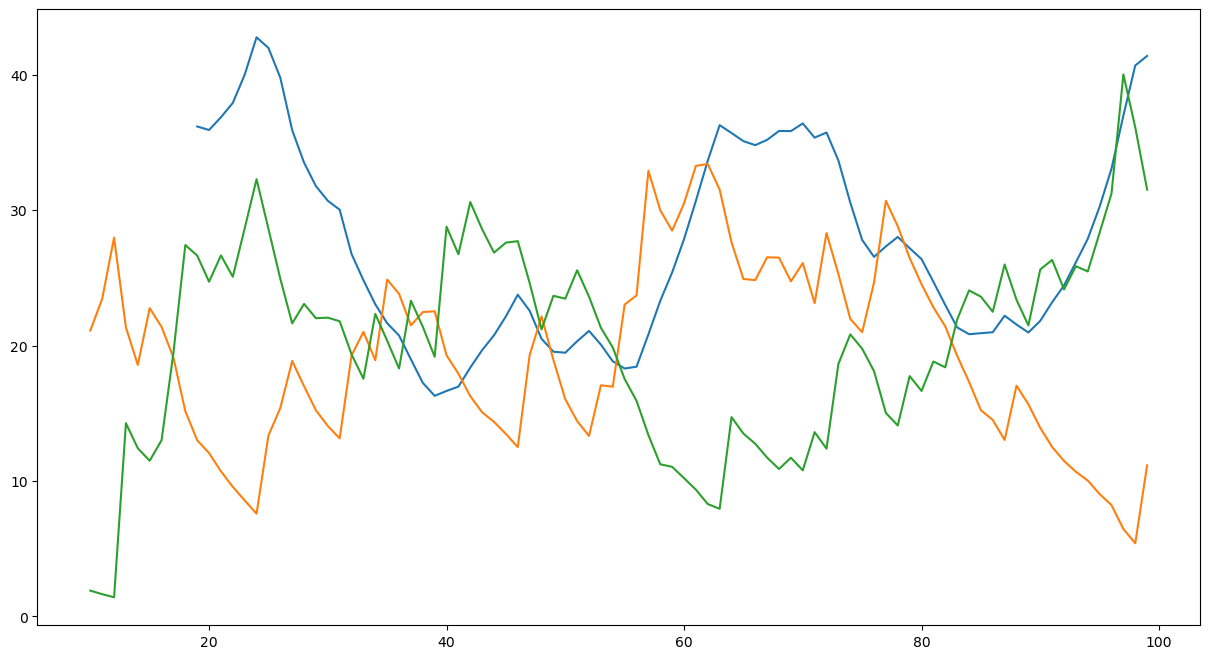

In [38]:
plt.figure(figsize=(15, 8))
plt.plot(df.ta.adx(length=10).to_numpy()[:100])

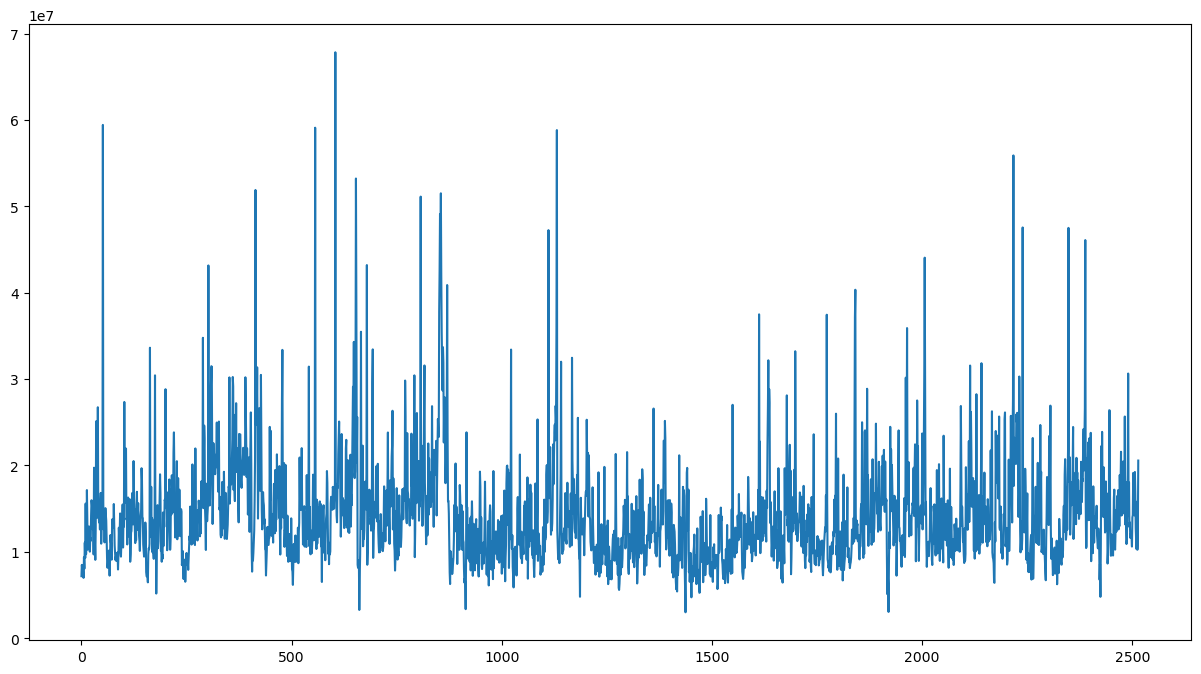

In [13]:
plt.figure(figsize=(15, 8))
plt.plot(df.loc[:,'Volume'].to_numpy())